In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [38]:
Sb=pd.read_csv("SBI_Life_insurance.csv")
Sb

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [39]:
Sb.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [40]:
Sb.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [41]:
Sb.shape

(1338, 8)

In [42]:
Sb.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [43]:
Sb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [44]:
Sb.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [45]:
Sb.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

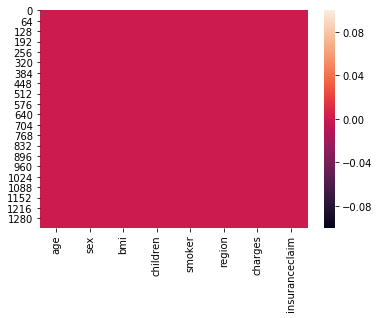

In [46]:
sns.heatmap(Sb.isnull())

In [47]:
Sb.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

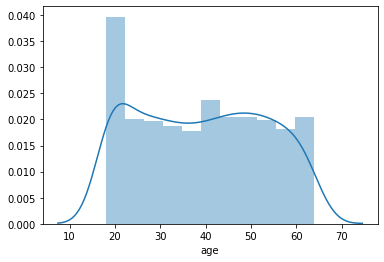

In [48]:
sns.distplot(Sb['age'])

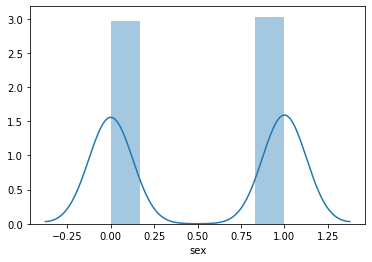

In [49]:
sns.distplot(Sb['sex'])

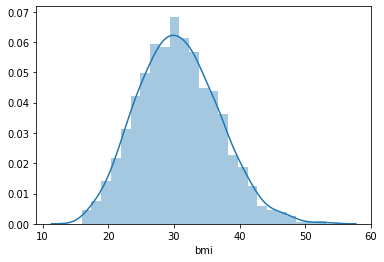

In [50]:
sns.distplot(Sb['bmi'])

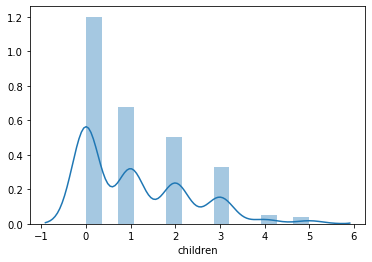

In [51]:
sns.distplot(Sb['children'])

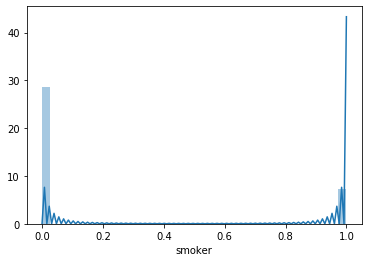

In [52]:
sns.distplot(Sb['smoker'])

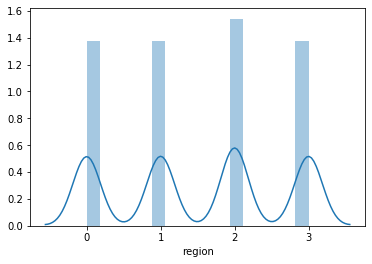

In [53]:
sns.distplot(Sb['region'])

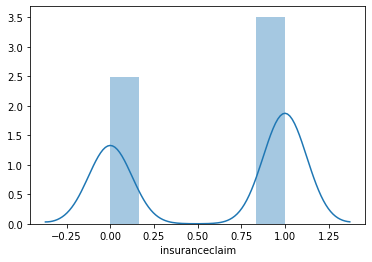

In [54]:
sns.distplot(Sb['insuranceclaim'])

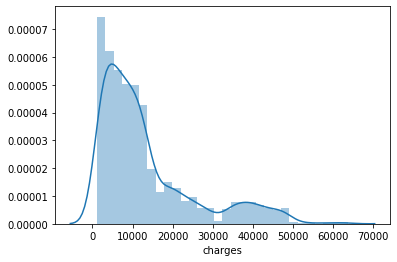

In [55]:
sns.distplot(Sb['charges'])

In [56]:
from scipy.stats import boxcox
Sb['charges']=boxcox(Sb['charges'],0)


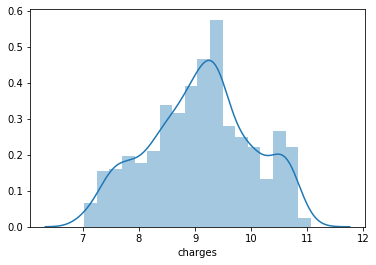

In [57]:
sns.distplot(Sb['charges'])

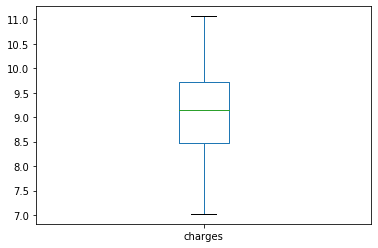

In [58]:
Sb['charges'].plot.box()

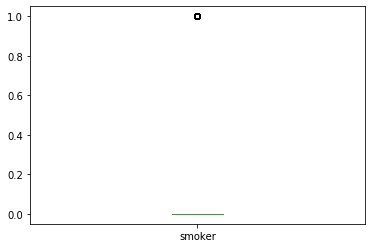

In [59]:
Sb['smoker'].plot.box()

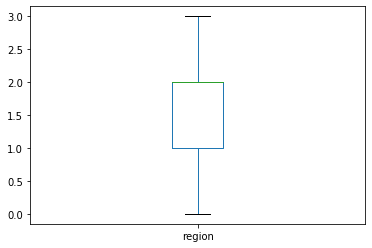

In [60]:
Sb['region'].plot.box()

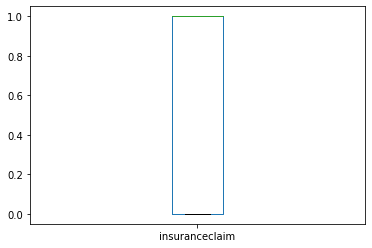

In [61]:
Sb['insuranceclaim'].plot.box()

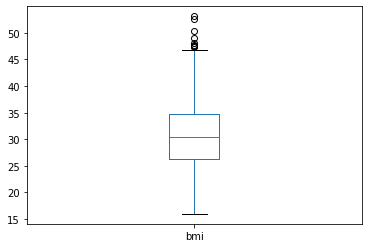

In [62]:
Sb['bmi'].plot.box()

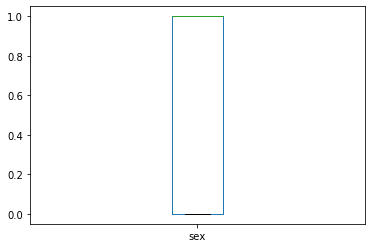

In [63]:
Sb['sex'].plot.box()

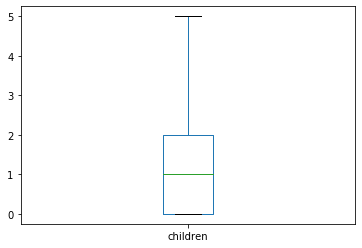

In [64]:
Sb['children'].plot.box()

In [65]:
Sb['bmi']=boxcox(Sb['bmi'],0)

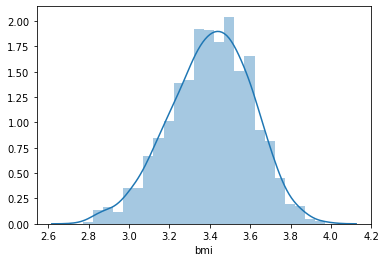

In [66]:
sns.distplot(Sb['bmi'])

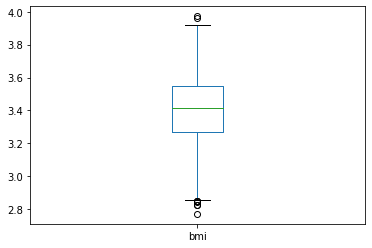

In [67]:
Sb['bmi'].plot.box()

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(Sb))
z

array([[1.43876426, 1.0105187 , 0.36715989, ..., 1.34390459, 0.69139378,
        0.84190989],
       [1.50996545, 0.98959079, 0.57617462, ..., 0.43849455, 1.79001952,
        0.84190989],
       [0.79795355, 0.98959079, 0.46222486, ..., 0.43849455, 0.75950049,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.00737926, ..., 0.43849455, 1.85210648,
        0.84190989],
       [1.29636188, 1.0105187 , 0.75375056, ..., 1.34390459, 1.62512899,
        1.18777557],
       [1.55168573, 1.0105187 , 0.16421154, ..., 0.46691549, 1.2851135 ,
        0.84190989]])

In [69]:
thershold=3
print(np.where(z>3))

(array([  32,   71,  166,  172,  413,  425,  438,  568,  640,  877,  932,
        937,  969,  984, 1085, 1116, 1130, 1245, 1272], dtype=int64), array([3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64))


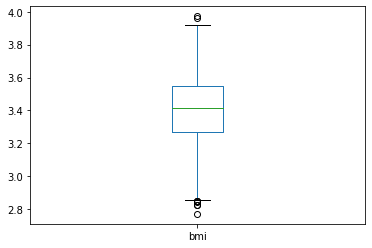

In [70]:
Sb['bmi'].plot.box()

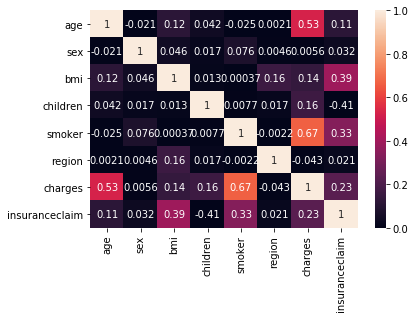

In [71]:
sns.heatmap(Sb.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [72]:
Sb_new=Sb[(z<3).all(axis=1)]

In [73]:
Sb_new.shape

(1319, 8)

In [74]:
Sb_new.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,3.328627,0,1,3,9.734176,1
1,18,1,3.519573,1,0,2,7.453302,1
2,28,1,3.496508,3,0,2,8.400538,0
3,33,1,3.122585,0,0,1,9.998092,0
4,32,1,3.363149,0,0,1,8.260197,1


In [75]:
x=Sb_new.loc[:,('age','sex','bmi','children','smoker','region','charges')]
x.shape  

(1319, 7)

In [76]:
y=Sb_new.loc[:,('insuranceclaim')]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [77]:
x.shape

(1319, 7)

In [78]:
y.shape

(1319,)

In [79]:
y=y.values.reshape(-1,1)

In [80]:
y.shape

(1319, 1)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=42)


In [83]:
x_train.shape

(1286, 7)

In [84]:
y_train.shape

(1286, 1)

In [85]:
x_test.shape

(33, 7)

In [86]:
y_test.shape

(33, 1)

In [87]:
# Algorithem -1:That is use 

In [88]:
lg=LogisticRegression()

In [89]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
pred=lg.predict(x_test)
print(pred)

[0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1]


In [91]:
print('accuracy score',accuracy_score(pred,y_test))

accuracy score 0.8484848484848485


In [92]:
print('confusion_matrix',confusion_matrix(y_test,pred))

confusion_matrix [[10  2]
 [ 3 18]]


In [93]:
print('classification_report',classification_report(y_test,pred))

classification_report               precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.90      0.86      0.88        21

    accuracy                           0.85        33
   macro avg       0.83      0.85      0.84        33
weighted avg       0.85      0.85      0.85        33



In [94]:
# Algorithem-2:That 


In [95]:
from sklearn.naive_bayes import GaussianNB

In [96]:
gnb=GaussianNB()

In [97]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
predgnb=gnb.predict(x_test)

In [99]:
print(predgnb)

[0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1]


In [100]:
print('accuracy_score',accuracy_score(predgnb,y_test))

accuracy_score 0.8787878787878788


In [101]:
print('confusion matrix',confusion_matrix(predgnb,y_test))

confusion matrix [[12  4]
 [ 0 17]]


In [102]:
print('classification matrix',classification_report(predgnb,y_test))

classification matrix               precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.81      1.00      0.89        17

    accuracy                           0.88        33
   macro avg       0.90      0.88      0.88        33
weighted avg       0.90      0.88      0.88        33



In [104]:
from sklearn.externals import joblib
joblib.dump(Sb,'SBI_life_.pkl')

['SBI_life_.pkl']